In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_excel('Data-2.xlsx',sheet_name='Sheet1')
df.head()

,Invoice No.,Date,Payment Type,My Amount (₹),Total (₹),Date.1,Time
0,23390,2023-07-31 23:56:47,Cash,10,10.0,2023-07-31,23:56:47
1,23389,2023-07-31 23:50:09,Cash,20,20.0,2023-07-31,23:50:09
2,23388,2023-07-31 23:47:13,Cash,40,40.0,2023-07-31,23:47:13
3,23387,2023-07-31 23:36:11,Cash,85,85.0,2023-07-31,23:36:11
4,23386,2023-07-31 23:29:01,Cash,40,40.0,2023-07-31,23:29:01


In [3]:
df.describe()

,Invoice No.,My Amount (₹),Total (₹)
count,15033.000000,15033.000000,15032.000000
mean,15867.121000,157.565290,156.973057
std,4345.130555,143.804232,142.160073
min,8343.000000,10.000000,10.000000
25%,12103.000000,60.000000,60.000000
50%,15867.000000,120.000000,120.000000
75%,19631.000000,215.000000,210.000000
max,23390.000000,3230.000000,3230.000000


<Axes: >

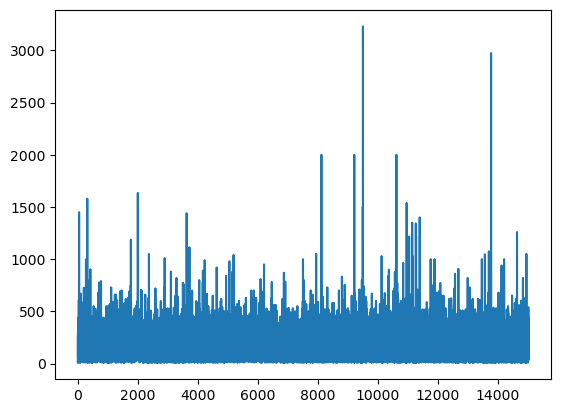

In [4]:
df['Total (₹)'].plot()

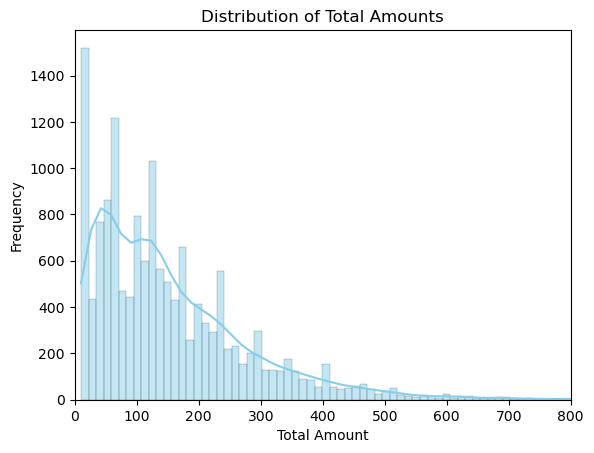

In [5]:
sns.histplot(df['Total (₹)'],kde=True, color='skyblue')
plt.xlim(0, 800)

plt.title('Distribution of Total Amounts')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

In [6]:
df['Date'] = pd.to_datetime(df['Date'])


In [7]:
monthly_totals = df.groupby(df['Date'].dt.month)['Total (₹)'].sum()
monthly_totals

Date
1     178337.0
2     158441.0
3     178201.0
4     148239.0
5      71228.0
6     111659.0
7     193385.0
8     250387.0
9     329131.0
10    320645.0
11    217169.0
12    202797.0
Name: Total (₹), dtype: float64

In [8]:
monthly_orders=df.groupby(df['Date'].dt.month)['Total (₹)'].count()
monthly_orders

Date
1     1182
2      971
3     1086
4      935
5      379
6      671
7     1138
8     1798
9     2151
10    1965
11    1441
12    1315
Name: Total (₹), dtype: int64

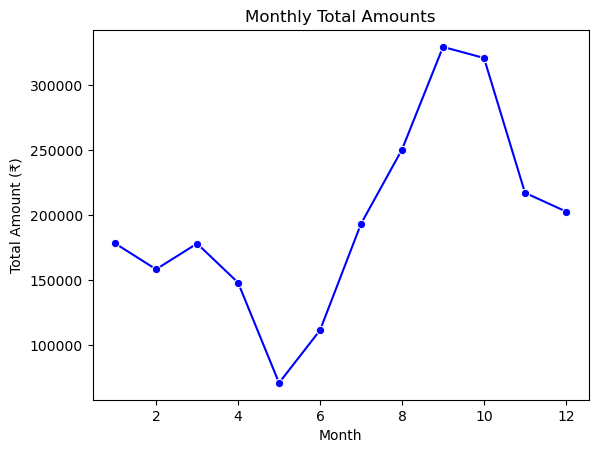

In [9]:
sns.lineplot(x=monthly_totals.index, y=monthly_totals.values, marker='o', color='b')
plt.title('Monthly Total Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount (₹)')
plt.show()

In [10]:
df['Time'] = df['Date'].apply(lambda x: x.time())

In [11]:
df['hour'] = df['Time'].apply(lambda x: x.hour)

In [12]:
hourly_total_sum = df.groupby('hour')['Total (₹)'].sum()
total=hourly_total_sum.sum()

In [13]:
total

2359619.0

In [14]:
hourly_total_sum

hour
0     172587.0
1      82871.0
2      15871.0
3       4390.0
7        120.0
8         80.0
9       4564.0
10     53599.0
11    135333.0
12    164880.0
13    192896.0
14    172723.0
15    170615.0
16    164470.0
17    136526.0
18    143167.0
19    140270.0
20    157781.0
21    153940.0
22    141563.0
23    151373.0
Name: Total (₹), dtype: float64

In [15]:
hourly_percentage_sum=(hourly_total_sum / total) * 100
hourly_percentage_sum

hour
0     7.314189
1     3.512050
2     0.672609
3     0.186047
7     0.005086
8     0.003390
9     0.193421
10    2.271511
11    5.735375
12    6.987569
13    8.174879
14    7.319953
15    7.230616
16    6.970193
17    5.785934
18    6.067378
19    5.944604
20    6.686715
21    6.523935
22    5.999401
23    6.415146
Name: Total (₹), dtype: float64

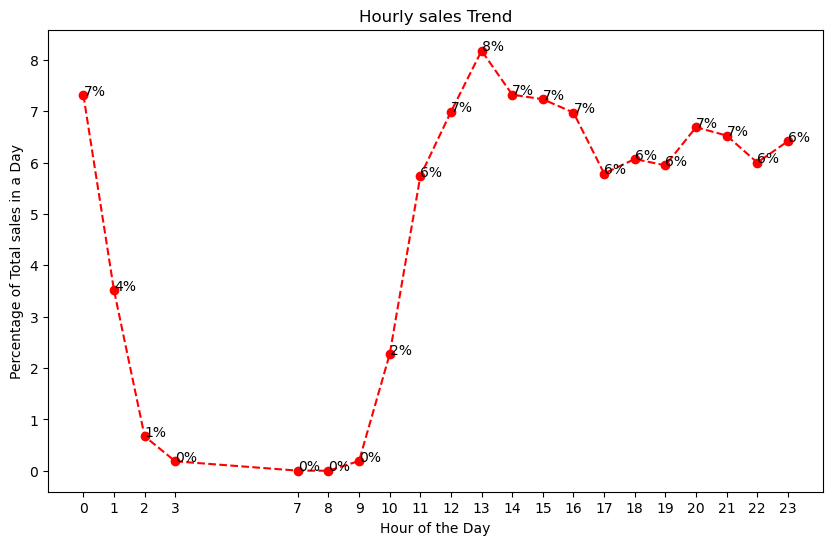

In [27]:
plt.figure(figsize=(10, 6))
plt.yticks(range(11))
plt.plot(hourly_percentage_sum.index, hourly_percentage_sum.values,'ro--')
plt.xticks(hourly_percentage_sum.index)
for hour, percentage in hourly_percentage_sum.items():
    plt.text(hour, percentage,'{:.0f}%'.format(percentage))
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Total sales in a Day')
plt.title('Hourly sales Trend')
plt.savefig('hourly_sales trend.png', bbox_inches='tight', transparent=True)
plt.show()

plt.show()

In [17]:
payment=df['Payment Type'].value_counts()


In [18]:
payment

Cash                  9359
Other [Phone Pay]     5520
Other [Paytm]           84
Part Payment            62
Other [Google Pay]       8
Name: Payment Type, dtype: int64

In [19]:
online=0
for i in range(1,5):
  print(i,payment[i])
  online+=payment[i]
cash=payment[0]
print(cash,online)

1 5520
2 84
3 62
4 8
9359 5674


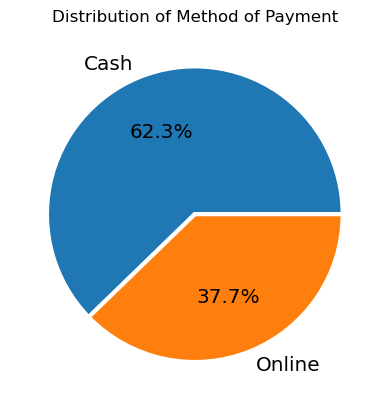

In [20]:
plt.pie([cash,online],labels=['Cash','Online'],autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'})

plt.title('Distribution of Method of Payment')
plt.show()

In [21]:
df.groupby('Date')['Total (₹)'].sum()

Date
2022-08-01 09:47:33    290.0
2022-08-01 10:05:21     40.0
2022-08-01 10:11:21    150.0
2022-08-01 10:24:05    120.0
2022-08-01 10:49:20     40.0
                       ...  
2023-07-31 23:29:01     40.0
2023-07-31 23:36:11     85.0
2023-07-31 23:47:13     40.0
2023-07-31 23:50:09     20.0
2023-07-31 23:56:47     10.0
Name: Total (₹), Length: 15033, dtype: float64

In [22]:
df['Month']=df['Date'].dt.month

df.groupby('Month')['Total (₹)'].sum()//df['Date'].dt.days_in_month[1:13]

Month
1      5752.0
2      5111.0
3      5748.0
4      4781.0
5      2297.0
6      3601.0
7      6238.0
8      8077.0
9     10617.0
10    10343.0
11     7005.0
12     6541.0
dtype: float64

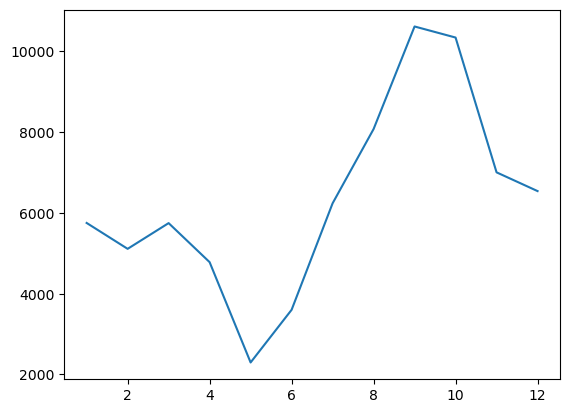

In [23]:
plt.plot(df.groupby('Month')['Total (₹)'].sum()//df['Date'].dt.days_in_month[1:13])

In [24]:
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

df["Season"] = df["Date"].dt.month.map(get_season)


In [25]:
df.groupby('Season')['Total (₹)'].sum()

Season
Fall      866945.0
Spring    397668.0
Summer    555431.0
Winter    539575.0
Name: Total (₹), dtype: float64

<BarContainer object of 4 artists>

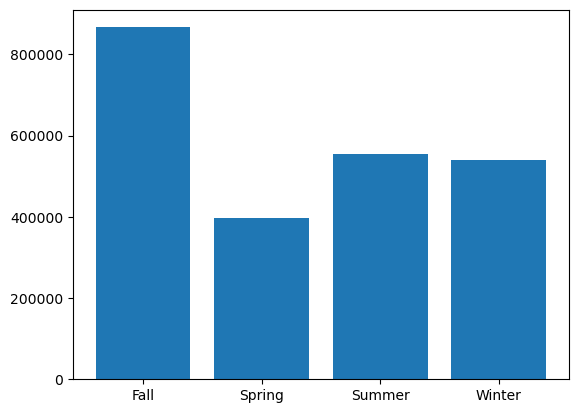

In [26]:
plt.bar(['Fall','Spring','Summer','Winter'],df.groupby('Season')['Total (₹)'].sum())